Forecasted 3-Month Euribor Rates:
2023-06: 3.4752
2023-07: 3.5345
2023-08: 3.5669


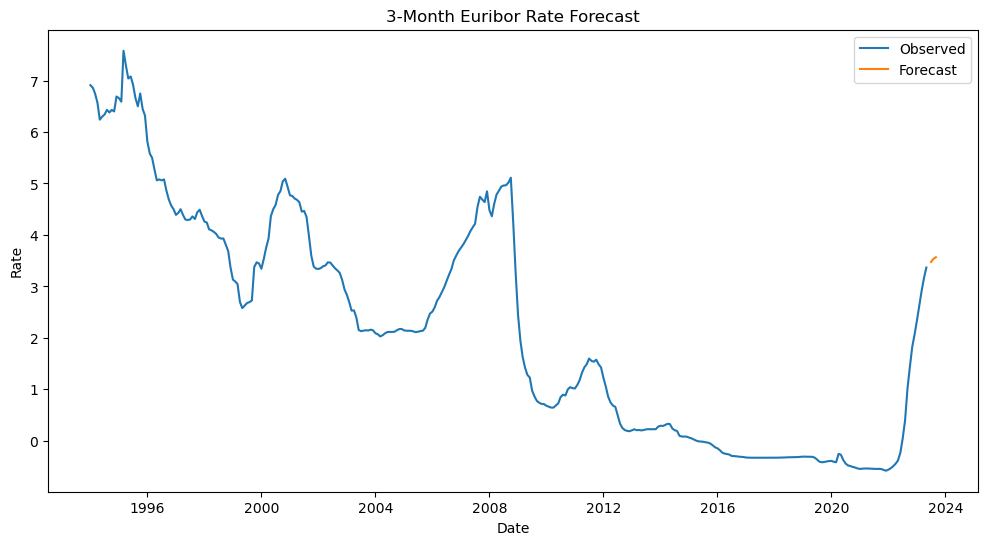

In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df = pd.read_csv("euribor_3mo_historical_close_avg_through_period_31011994_to_31052023.csv")

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

df.index.freq = 'MS'

model = ARIMA(df['Rate'], order=(1,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=3)

future_dates = pd.date_range(df.index[-1], periods=4, freq='M')[1:] # Exclude the last known point

print("Forecasted 3-Month Euribor Rates:")
for date, value in zip(future_dates, forecast):
    print(f"{date.strftime('%Y-%m')}: {value:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rate'], label='Observed')
plt.plot(future_dates, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('3-Month Euribor Rate Forecast')
plt.legend()
plt.show()
